#  Masking Pipeline

In [49]:
from chxanalys.chx_libs import np, roi, time, datetime, os,  getpass, db, get_images,LogNorm, plt,ManualMask

from chxanalys.chx_generic_functions import (get_detector, get_fields, get_sid_filenames,load_data, 
                                             RemoveHot, show_img, get_avg_img)
 
%matplotlib notebook

ImportError: cannot import name 'RemoveHot'

# Path for Saving Results

In [3]:
path = '/XF11ID/analysis/2016_2/yuzhang/Results/'
print ("The analysis results will be saved in : %s"%path)

The analysis results will be saved in : /XF11ID/analysis/2016_2/yuzhang/Results/


### Get the image series and metadata from the uid

In [8]:
uid = 'ffe9d518'  # 10 mTorr 1sec/frame

#hdr = db[uid]

In [9]:
detector = get_detector( db[uid ] )
print ('Detector is:  %s'%detector  )
sud = get_sid_filenames(db[uid])
print ('scan_id, full-uid, data path are:  %s--%s--%s'%(sud[0], sud[1], sud[2][0] ))

Detector is:  eiger_4M_cam_img_image_lightfield
scan_id, full-uid, data path are:  671--ffe9d518-aa6a-43d7-8eb0-17e285796e7b--/XF11ID/data/2015/11/8/3f84f57d-79b7-4a10-8b51_5


In [12]:
imgs = load_data( uid, detector  )
md = imgs.md

hdf5 path = /XF11ID/data/2015/11/8/3f84f57d-79b7-4a10-8b51_5_master.h5


In [13]:
imgs

<Frames>
Length: 15000 frames
Frame Shape: 2167 x 2070
Pixel Datatype: uint32

In [14]:
Nimg=len(imgs)

## show image and the pixel mask

<IPython.core.display.Javascript object>


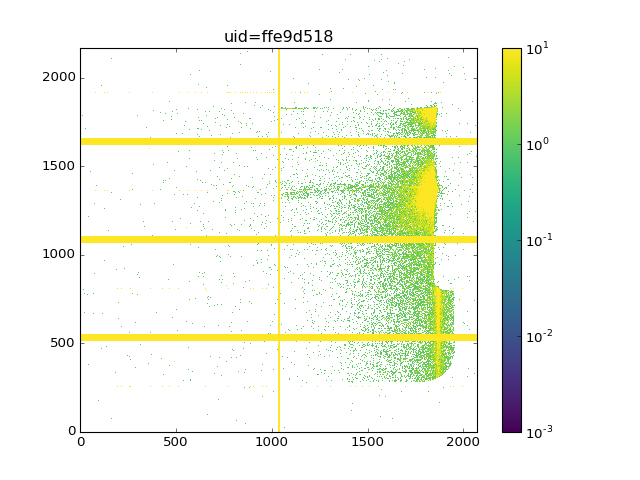

In [19]:
show_img(  imgs[0] , vmin=.001, vmax=10, logs=True, image_name ='uid=%s'%uid )

<IPython.core.display.Javascript object>


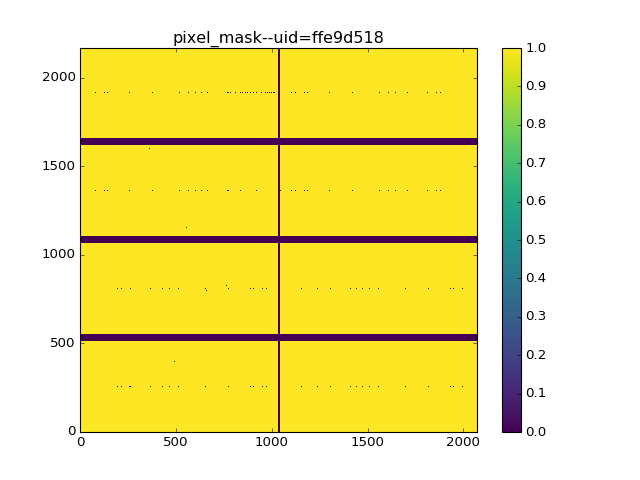

In [21]:
show_img(md['pixel_mask'], vmin=0, vmax=1, image_name ='pixel_mask--uid=%s'%uid )

## Remove hotspots in the image

<IPython.core.display.Javascript object>


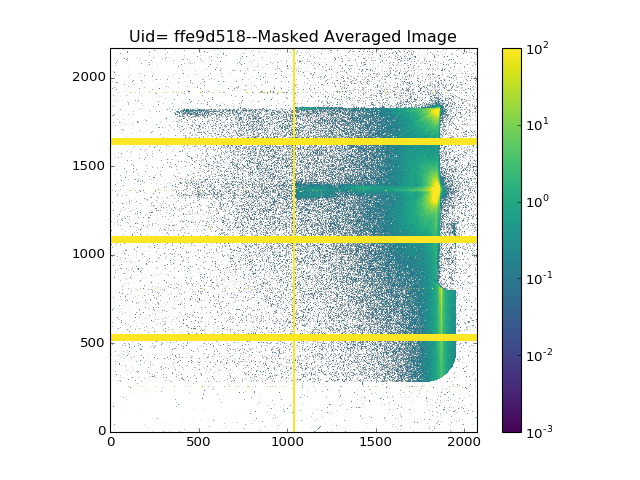

In [25]:
avg_img =  get_avg_img( imgs, sampling = 1000, plot_ = True, uid =uid)

<IPython.core.display.Javascript object>


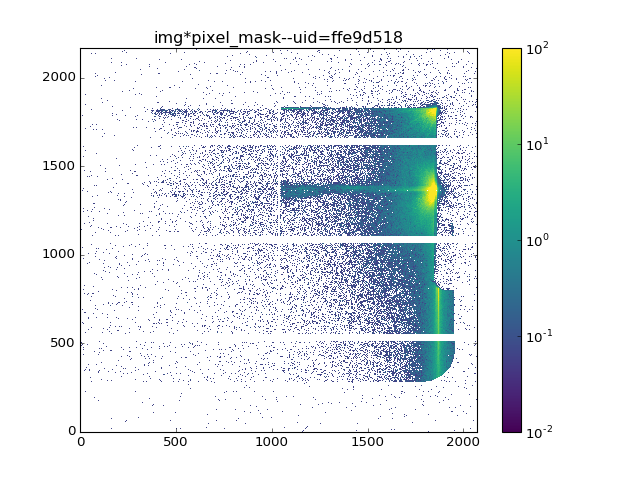

In [26]:
show_img(  avg_img*md['pixel_mask'],   vmin= .01, vmax= 100, logs= True, image_name ='img*pixel_mask--uid=%s'%uid )

<IPython.core.display.Javascript object>


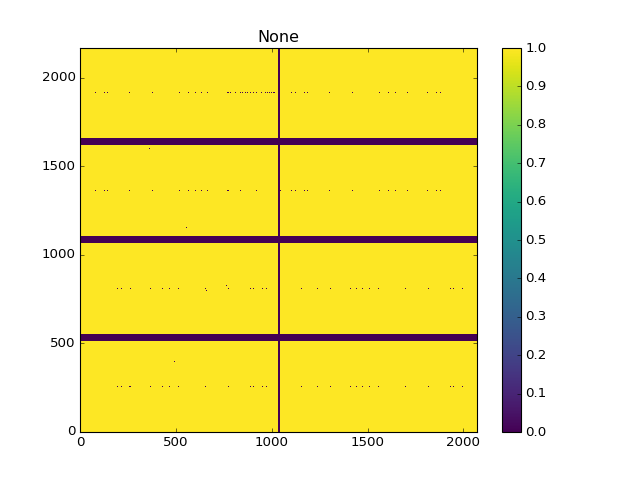

In [31]:
mask_rh  = RemoveHot( avg_img, 5E4, plot_=True)

## Manually create the mask file

<IPython.core.display.Javascript object>


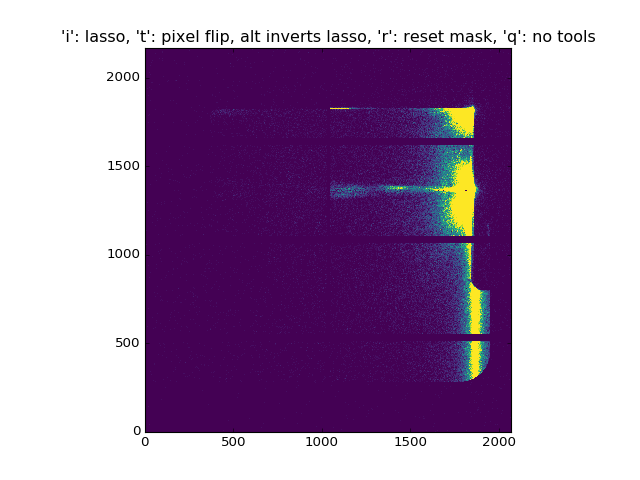

In [38]:
fig, ax = plt.subplots()
m = ManualMask(ax, avg_img* md['pixel_mask']*mask_rh,
               cmap='viridis',origin='lower',
               vmin=.01, vmax=1.50) 
plt.show()

<IPython.core.display.Javascript object>


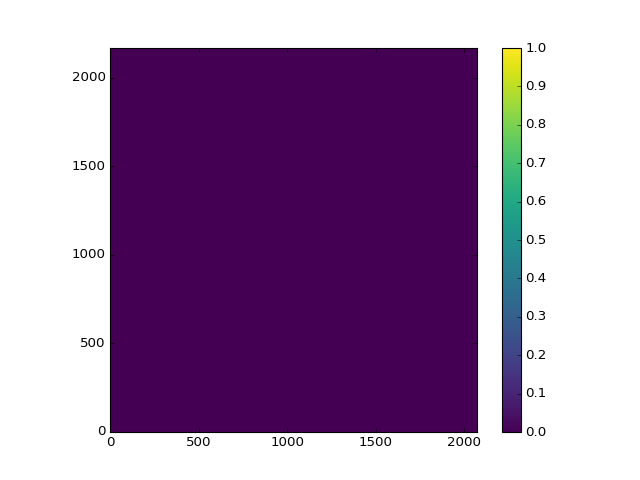

In [39]:
new_mask = m.mask
manu_mask  = new_mask.copy()
fig, ax = plt.subplots()
im=ax.imshow(new_mask,origin='lower' ,vmin=0, vmax=1,cmap='viridis')
fig.colorbar(im)
plt.show()

In [40]:
manu_mask  = new_mask.copy()

# Create rectangle mask

In [41]:
#new_mask = np.zeros_like( avg_img , dtype = bool)
# capton window
#new_mask[2000:2167, :] = True
#new_mask[:, :100] = True
#new_mask[1700:2167, 100:300] = True

# capton window
#new_mask[:, :120] = True
#new_mask[:120, :] = True
#new_mask[:200, :200] = True
#new_mask[-120:, 0:200] = True

#the h-beam stop
new_mask[  1820:1840,:] = True #a horenzatal one

#new_mask[:, 1190:1230] = True #a vertical one


#new_mask[1450:1520, :] = True

#new_mask[1290:1380, 1370:2070] = True
#new_mask[:, 1180:1220] = True

#new_mask[1260:1380, 1150:1265] = True



<IPython.core.display.Javascript object>


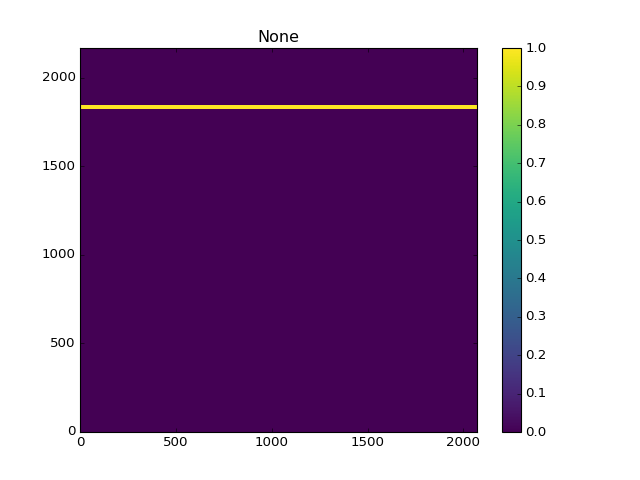

In [42]:
show_img( new_mask )

In [43]:
Mask = np.array ( ~new_mask*  md['pixel_mask']*mask_rh, dtype = bool )

<IPython.core.display.Javascript object>


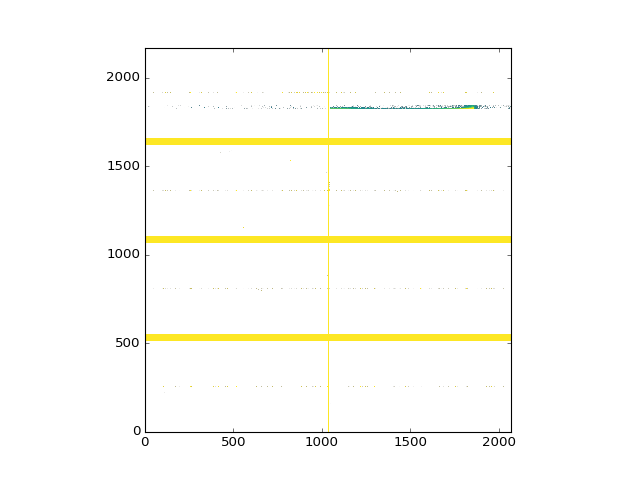

In [45]:
fig, ax = plt.subplots()
#new_mask = 
im=ax.imshow(   (~Mask) * avg_img,origin='lower' , 
      norm= LogNorm( vmin=0.001, vmax=30 ), cmap='viridis')
#im = ax.imshow(avg_img,  cmap='viridis',origin='lower', norm= LogNorm( vmin=0.001, vmax=100 ) )
plt.show()


<IPython.core.display.Javascript object>


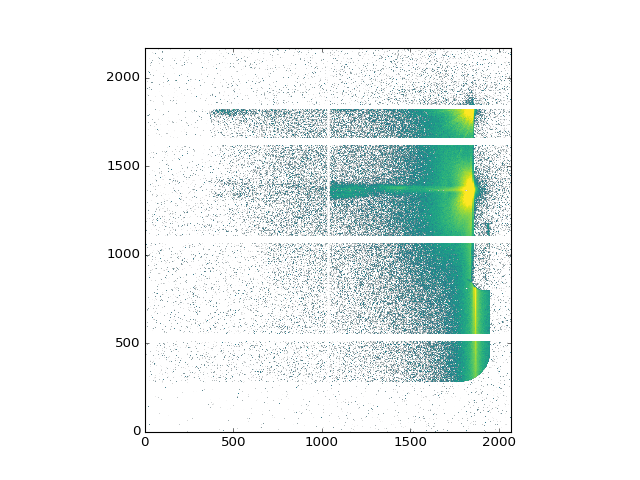

In [46]:
fig, ax = plt.subplots()
#new_mask = 
im=ax.imshow(   (Mask) * avg_img,origin='lower' , 
      norm= LogNorm( vmin=0.001, vmax=30 ), cmap='viridis')
#im = ax.imshow(avg_img,  cmap='viridis',origin='lower', norm= LogNorm( vmin=0.001, vmax=100 ) )
plt.show()

## Combine the hand-drawn mask and the pixel mask and hot pixel mask

<IPython.core.display.Javascript object>


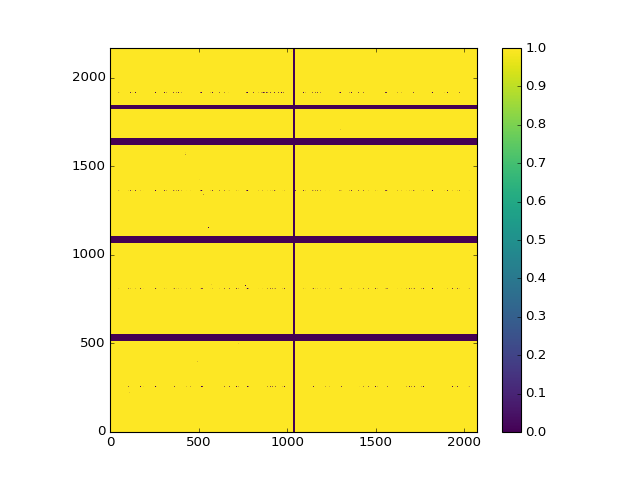

In [47]:
mask = (~new_mask)*md['pixel_mask']*mask_rh

fig, ax = plt.subplots()
im=ax.imshow(mask, origin='lower' ,vmin=0, vmax=1,cmap='viridis')
fig.colorbar(im)
plt.show()

## Save the combined mask to use in further data analysis

In [70]:
np.save(  path +   uid +"_mask", mask)

In [48]:
path +   uid +"_mask"

'/XF11ID/analysis/2016_2/yuzhang/Results/ffe9d518_mask'